In [17]:
import pandas as pd
import numpy as np
import os 
os.chdir(r"C:\Users\dai\Desktop\S-AI\MachineLearning\Day12\Datasets")
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing

In [41]:
milk = pd.read_csv("monthly-milk-production-pounds-p.csv",index_col=0)

In [43]:
milk.head()

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727


In [60]:
y = milk['Milk']
y_train = y[:156] # y_train= y[:-12]
y_test = y[156:] # y_test = y[-12:]

In [47]:
y_train.shape, y_test.shape

((156,), (12,))

In [49]:
holt = Holt(y_train, exponential=True)
#alpha, beta = 0.2, 0.4
fit3 = holt.fit() #smoothing_level=alpha, smoothing_trend= beta
fcast3 = fit3.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


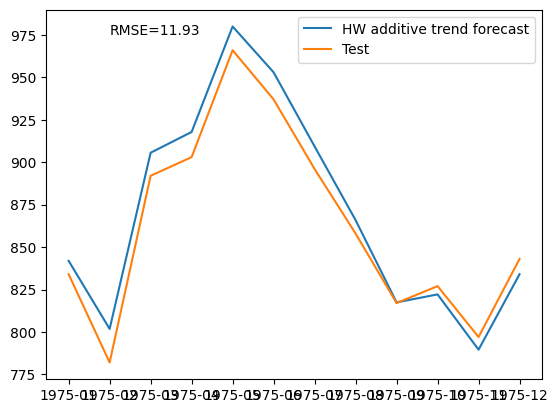

In [72]:
#alpha, beta, gamma = 0.2,0.1, 0.9
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal ='add')
fit3 = hw_m.fit() #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index= y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(1
         ,975, "RMSE="+str(error))
plt.plot(hw_m_fcast,label= "HW additive trend forecast")
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


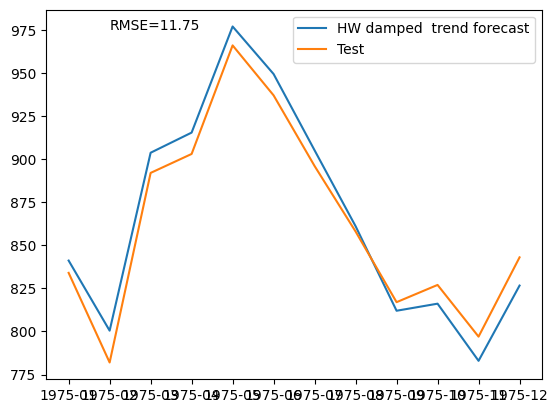

In [78]:
#alpha, beta, gamma = 0.2,0.1, 0.9
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal ='add', damped_trend=True)
fit3 = hw_m.fit() #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index= y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(1
         ,975, "RMSE="+str(error))
plt.plot(hw_m_fcast,label= "HW damped  trend forecast")
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [80]:
hw_m.params

{'smoothing_level': 0.6970637733786135,
 'smoothing_trend': 9.738858848528262e-07,
 'smoothing_seasonal': 0.21179841987963208,
 'damping_trend': 0.9949980209932205,
 'initial_level': 606.7162599591019,
 'initial_trend': 2.3070790516850126,
 'initial_seasons': array([-20.23215467, -49.43082852,  34.90357245,  49.30093163,
        114.36618411,  87.87168051,  30.24734453, -17.65968633,
        -58.24130837, -55.42232966, -78.9048949 , -44.1725092 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Resampling the series as yearly

In [85]:
milk = pd.read_csv("monthly-milk-production-pounds-p.csv",index_col=0)
y = milk['Milk'] 
y.index = pd.DatetimeIndex(y.index).to_period("M")
type(y.index)

pandas.core.indexes.period.PeriodIndex

C:\Users\dai\AppData\Local\Temp\ipykernel_14524\1909857926.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  y_yearly = y.resample('Y').sum()


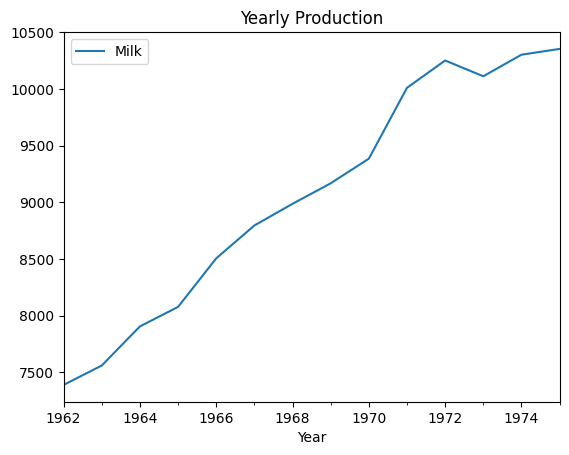

In [136]:
y_yearly = y.resample('Y').sum()
y_yearly.index.rename('Year',inplace= True)
y_yearly.plot()
plt.title("Yearly Production")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
plt.show()

In [139]:
y_train = y_yearly[:-3]
y_test = y_yearly[-3:]

In [141]:
y_train.shape, y_test.shape

((11, 1), (3, 1))

In [147]:
holt = Holt(y_train)
alpha, beta = 0.2, 0.4
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend= beta)
fcast1 = fit1.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


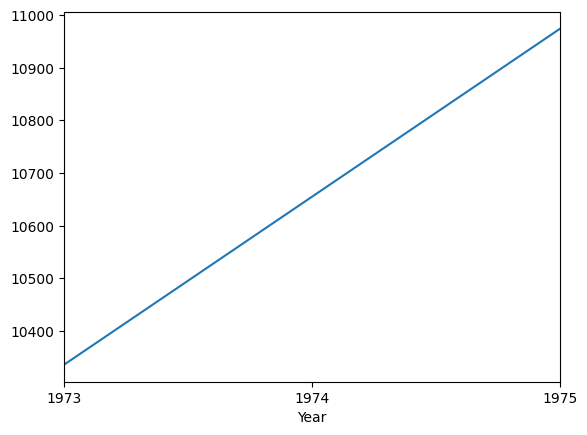

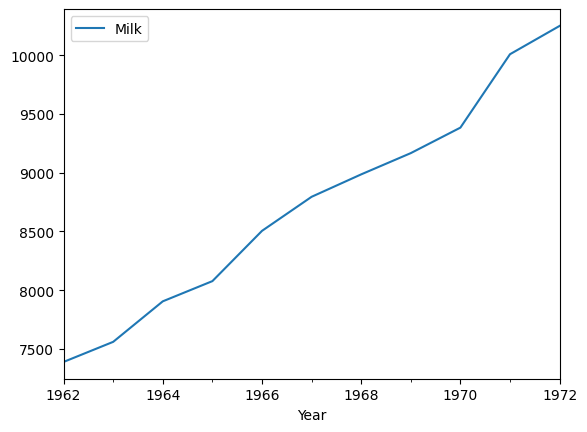

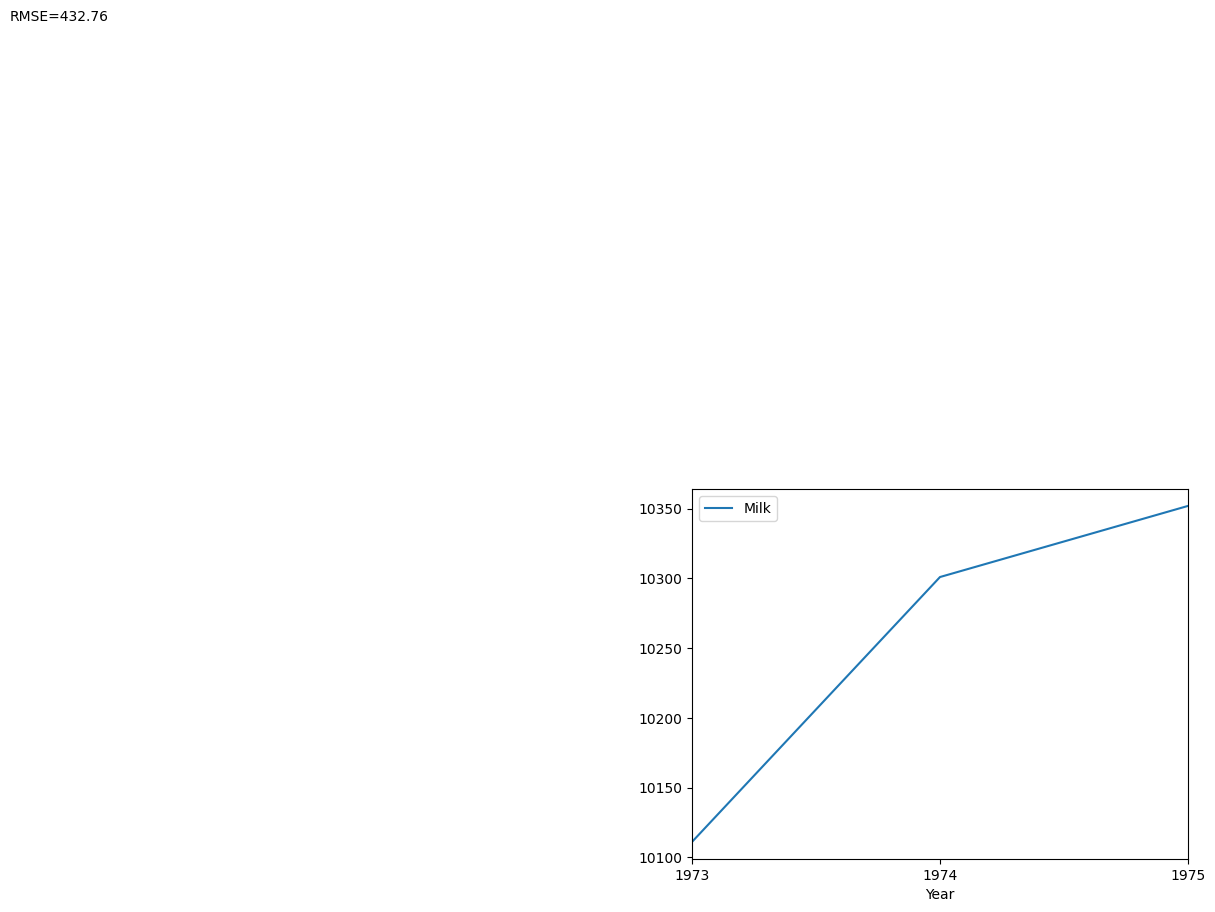

In [181]:
holt_fcast = pd.Series(fcast1, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
holt_fcast.plot(label= "Holt forecast")
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.text(0.25,10700, "RMSE="+str(error))
plt.legend(loc='best')
plt.show()

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


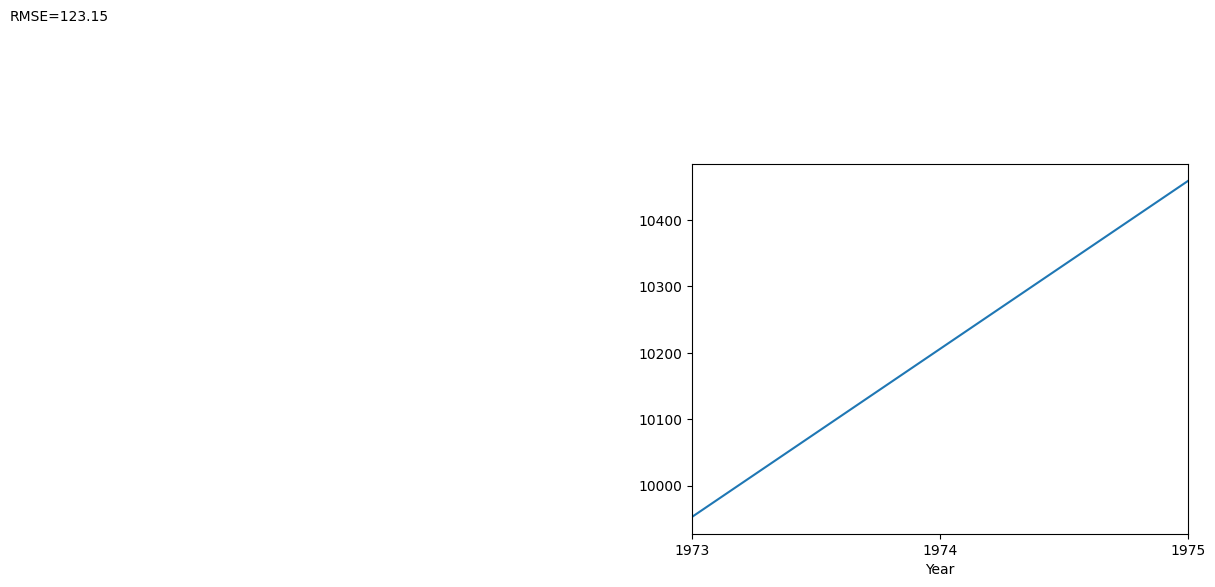

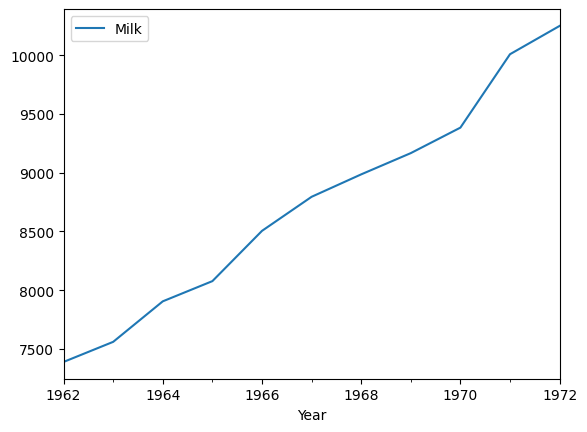

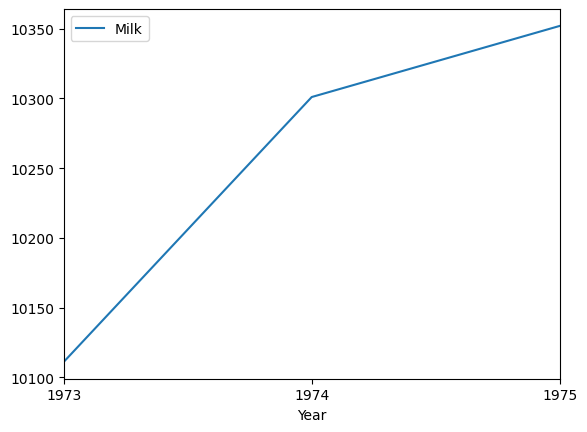

In [201]:
holt = Holt(y_train,damped_trend=True)
alpha, beta, phi = 0.1, 0.3, 0.9999
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend= beta, damping_trend= phi)
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
plt.text(0.25,10700, "RMSE="+str(error))
holt_fcast.plot(label= "Holt forecast")
y_train.plot(label='Train')
y_test.plot(label='Test')

plt.legend(loc='best')
plt.show()

In [203]:
holt.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.3,
 'smoothing_seasonal': nan,
 'damping_trend': 0.9999,
 'initial_level': 7389.0,
 'initial_trend': 171.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}